In [11]:
import pandas as pd
import numpy as np
import os
import pickle_funcs as pk
import helpers
from matplotlib import pyplot
import sqlite3
out_path = "C:/Users/dasen/Google Drive/SYNC TO PC/"
downloads = "C:/Users/dasen/Downloads/"

# Description

Exploration and setup of data for [kaggle project.](https://www.kaggle.com/c/zillow-prize-1/data)

I want to create a database for this project so that all data can be in a centralized location.

# Load Data

In [12]:
# create list of filenames in my downloads folder
files = [x for x in list(os.walk(downloads))[0][2] if '.csv' in x or '.xlsx' in x]
files

['data_dictionary.xlsx',
 'properties.csv',
 'sample_submission.csv',
 'train.csv']

In [13]:
def write(table_name, df):
    """Writes a dataframe to the database"""
    conn = sqlite3.connect(out_path + 'data998_database.sqlite3')
    df.to_sql(table_name, conn, if_exists='replace')
    conn.close()

## Review and Write Data Dictionary

In [14]:
files[0]

'data_dictionary.xlsx'

In [15]:
%%time
# load and view
df = pd.read_excel(downloads + files[0])
df.columns = ['feature', 'description']
df.head(10)

Wall time: 323 ms


In [16]:
%%time
# write data dictionary 
write('data_dictionary', df)

Wall time: 523 ms


## Review and Write Properties Data

In [17]:
files[1]

'properties.csv'

After first loading this data, I received this error: 

```
<string>:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False
```

Here are the descriptions of each of these columns: 

```
count     69014
unique        1
top        True
freq      69014
Name: hashottuborspa, dtype: object

count     2972940
unique        240
top          0100
freq      1153896
Name: propertycountylandusecode, dtype: object

count     1978629
unique       5638
top          LAR1
freq       275029
Name: propertyzoningdesc, dtype: object

count     5163
unique       1
top       True
freq      5163
Name: fireplaceflag, dtype: object

count     56462
unique        1
top           Y
freq      56462
Name: taxdelinquencyflag, dtype: object
```

For now, I'm just going to load these columns as string columns by using the `dtype` argument in the `read_csv` method. 

In [18]:
# dict to set types of columns 
types = {22: str, 32: str, 34: str, 49: str, 55: str}

In [19]:
%%time
# load and view 
df = pd.read_csv(downloads + files[1], dtype=types)

Wall time: 21.7 s


In [20]:
df.shape

(2985217, 58)

In [21]:
df.sample(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
1773684,11448291,NaN,NaN,NaN,3.0,4.0,NaN,4.0,3.0,NaN,...,NaN,NaN,177500.0,709000.0,2015.0,531500.0,8115.26,NaN,NaN,6.037650e+13
490631,11946980,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,650000.0,1550000.0,2015.0,900000.0,19761.31,NaN,NaN,NaN
839853,12325073,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,...,NaN,NaN,60000.0,178000.0,2015.0,118000.0,2576.45,NaN,NaN,6.037554e+13
2363045,11664240,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,...,NaN,NaN,160872.0,804384.0,2015.0,643512.0,9956.16,NaN,NaN,6.037263e+13
312713,17156980,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,NaN,...,2.0,NaN,189551.0,379102.0,2015.0,189551.0,4406.92,NaN,NaN,6.111004e+13
2696379,11852756,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,NaN,NaN,138358.0,220532.0,2015.0,82174.0,3586.36,NaN,NaN,6.037530e+13
1673105,12345930,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,NaN,...,NaN,NaN,115479.0,249752.0,2015.0,134273.0,3332.52,NaN,NaN,6.037554e+13
2887070,11052044,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,NaN,NaN,144531.0,474290.0,2015.0,329759.0,5900.16,NaN,NaN,6.037110e+13
2042001,11686012,NaN,NaN,NaN,1.0,2.0,NaN,7.0,1.0,NaN,...,NaN,NaN,53720.0,138557.0,2015.0,84837.0,2183.91,NaN,NaN,6.037800e+13
1631601,13891005,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,...,1.0,NaN,NaN,1076738.0,2015.0,1076738.0,21279.88,NaN,NaN,6.059063e+13


In [22]:
%%time
# write properties data 
write('properties', df)

Wall time: 2min 41s


In [23]:
# create index on properties
conn = sqlite3.connect(helpers.db_path)
cur = conn.cursor()
cur.execute("create index properties_index on properties (parcelid)")
conn.close()

## Review and Write Sample Submissions

In [24]:
files[2]

'sample_submission.csv'

In [25]:
%%time
# load and view
df = pd.read_csv(downloads + files[2])

Wall time: 2.2 s


In [26]:
df.head(10)

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0
5,10898347,0,0,0,0,0,0
6,10933547,0,0,0,0,0,0
7,10940747,0,0,0,0,0,0
8,10954547,0,0,0,0,0,0
9,10976347,0,0,0,0,0,0


In [27]:
%%time
# write sample submission data 
write('sample', df)

Wall time: 10.3 s


## Review and Write Sample Submissions

In [28]:
files[3]

'train.csv'

In [29]:
%%time
# load and view
df = pd.read_csv(downloads + files[3])

Wall time: 69 ms


In [30]:
df.head(10)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
5,11509835,-0.2705,2016-01-02
6,12286022,0.0440,2016-01-02
7,17177301,0.1638,2016-01-02
8,14739064,-0.0030,2016-01-02
9,14677559,0.0843,2016-01-03


In [31]:
df.shape

(90275, 3)

In [32]:
%%time
# write training data 
write('train', df)

Wall time: 396 ms


In [34]:
%%time
# create index on train
conn = sqlite3.connect(helpers.db_path)
cur = conn.cursor()
cur.execute("create index train_index on train (parcelid)")
conn.close()

Wall time: 98.1 ms


# Review Database

In [35]:
helpers.inspect_database()

[('data_dictionary',), ('properties',), ('sample',), ('train',)]

# Compare speeds between sqlite3 and csv

I want to compare how long it takes to load data from a `csv` versus loading from the database. 

The properties file is very large. From the `csv`, it takes about 20 seconds to load:

In [36]:
%%time
# load and view 
df = pd.read_csv(downloads + 'properties.csv', dtype=types)

Wall time: 21.9 s


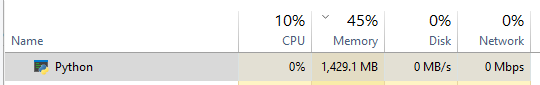

And the `sqlite3` database takes about three times as long, and takes much more memory:

In [37]:
%%time
# load and view from database 
query = """select * from properties"""
df = helpers.query_database(query)

Wall time: 1min 8s


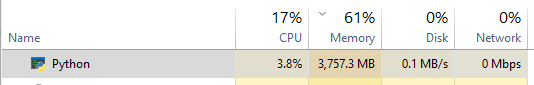